In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [48]:
def next_dubbins_state(s,u,h):
    """
    Forward Euler for Dubbins dynamics
    @param s: state, Nx3
    @param u: turn rate
    @param h: Euler constant (time step)
    @return: new states
    """
    if 1 == len(s.shape) and 3 == s.size:
        s = s.reshape(1,3)
    N,D = s.shape
    assert 3 == D

    dx = np.cos(s[:,2])
    dy = np.sin(s[:,2])
    dt = u * np.ones(N)

    ds = np.array([dx,dy,dt]).T
    assert ds.shape == s.shape

    return s + h*ds

In [49]:
def next_relative_state(s,u,v,h):
    if 1 == len(s.shape) and 3 == s.size:
        s = s.reshape(1,3)
    x = s[:,0]
    y = s[:,1]
    t = s[:,2]

    # Translate to zero out own-ship (x,y)
    x_p = x + h*(np.cos(t) - 1)
    y_p = y + h*(np.sin(t))

    # Rotation to zero out own-ship rotation
    phi = -h * u
    
    x_n = np.cos(phi)*x_p - np.sin(phi)*y_p
    y_n = np.sin(phi)*x_p + np.cos(phi)*y_p 
    t_n = t + h*(v - u)

    return np.array([x_n,y_n,t_n]).T

In [62]:
def relative_test(T,h,xo,xi, u, v):
    own_states = np.zeros((T,3))
    own_states[0,:] = xo
    
    other_states = np.zeros((T,3))
    other_states[0,:] = xi
    
    rel_states = np.zeros((T,3))
    rel_states[0,:] = xi - xo
    
    for i in xrange(T-1):
        own_states[i+1,:] = next_dubbins_state(own_states[i,:],u,h)
        other_states[i+1,:] = next_dubbins_state(other_states[i,:],v,h)
        rel_states[i+1,:] = next_relative_state(rel_states[i,:],u,v,h)

        
    plt.figure(figsize=(16,16))
    plt.subplot(2,2,1)
    plt.title("Relative")
    plt.plot(rel_states[:,0], rel_states[:,1],'.')
    plt.subplot(2,2,2)
    plt.title("Actual")
    plt.plot(own_states[:,0], own_states[:,1],'g.')
    plt.plot(other_states[:,0], other_states[:,1],'r.')

    plt.subplot(2,2,3)
    plt.plot(np.sqrt(np.power(rel_states[:,0],2) + np.power(rel_states[:,1],2)))
    plt.subplot(2,2,4)
    diff_states = other_states - own_states
    plt.plot(np.sqrt(np.power(diff_states[:,0],2) + np.power(diff_states[:,1],2)))
    plt.savefig('/home/epz/scratch/plane_dynamics.png')

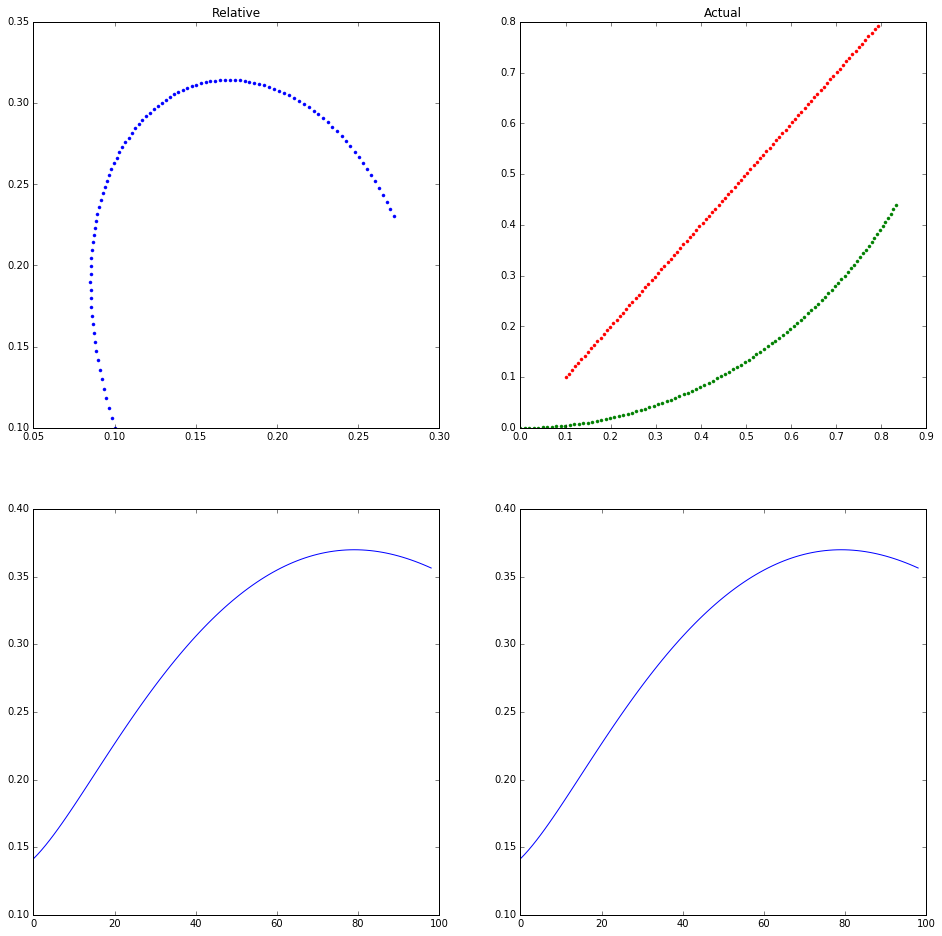

In [63]:
gamma = 0.99
relative_test(T=int(1. / (1 - gamma)), h=0.01,
              xo=np.array([0,0,0]),
              xi=np.array([0.1,0.1, np.pi / 4]),
              u=1, v=0);